# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | felidhoo
City not found. Skipping...
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | karratha
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | alice springs
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | port blair
Processing Record 13 of Set 1 | kerikeri
Processing Record 14 of Set 1 | cam pha mines
Processing Record 15 of Set 1 | ulsteinvik
Processing Record 16 of Set 1 | tazacorte
Processing Record 17 of Set 1 | vorgashor
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | kirkwall
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,18.53,95,90,8.02,SH,1704826705
1,adamstown,-25.0660,-130.1015,23.98,88,99,4.08,PN,1704826626
2,bethel,41.3712,-73.4140,5.20,86,100,5.66,US,1704826706
3,grytviken,-54.2811,-36.5092,7.62,82,58,2.73,GS,1704826706
4,karratha,-20.7377,116.8463,30.43,40,87,5.43,AU,1704826706


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,18.53,95,90,8.02,SH,1704826705
1,adamstown,-25.0660,-130.1015,23.98,88,99,4.08,PN,1704826626
2,bethel,41.3712,-73.4140,5.20,86,100,5.66,US,1704826706
3,grytviken,-54.2811,-36.5092,7.62,82,58,2.73,GS,1704826706
4,karratha,-20.7377,116.8463,30.43,40,87,5.43,AU,1704826706


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

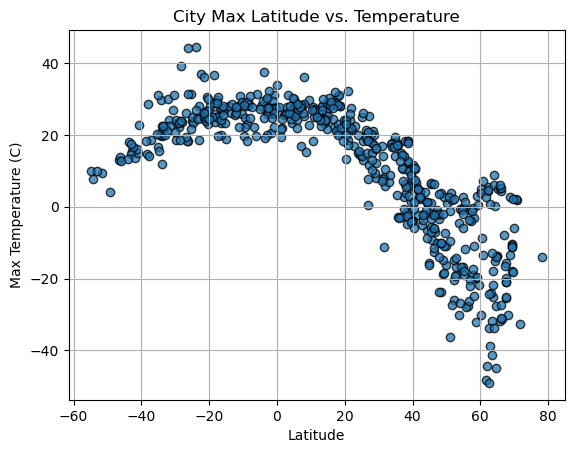

In [8]:
# Build scatter plot for latitude vs. temperature
x_scatter = city_data_df['Lat']
y_scatter= city_data_df['Max Temp']
plt.scatter(x_scatter, y_scatter, edgecolors= "black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

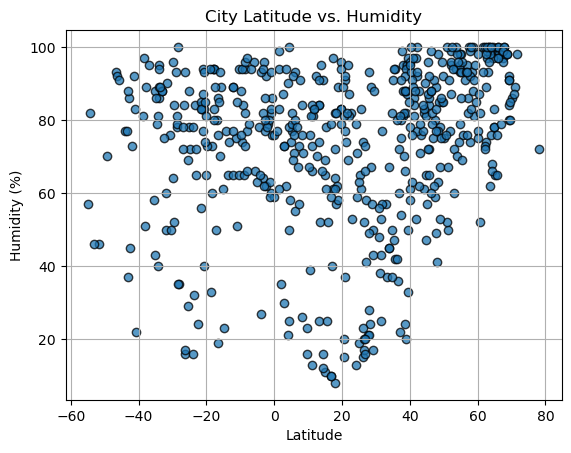

In [9]:
# Build scatter plot for latitude vs. humidity
x_scatter_hum = city_data_df['Lat']
y_scatter_hum= city_data_df['Humidity']
plt.scatter(x_scatter_hum, y_scatter_hum, edgecolors= "black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

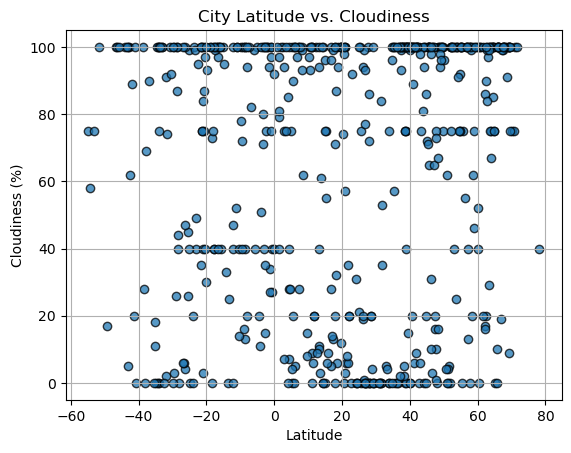

In [10]:
# Build scatter plot for latitude vs. cloudiness
x_scatter_cloud = city_data_df['Lat']
y_scatter_cloud= city_data_df['Cloudiness']
plt.scatter(x_scatter_cloud, y_scatter_cloud, edgecolors= "black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

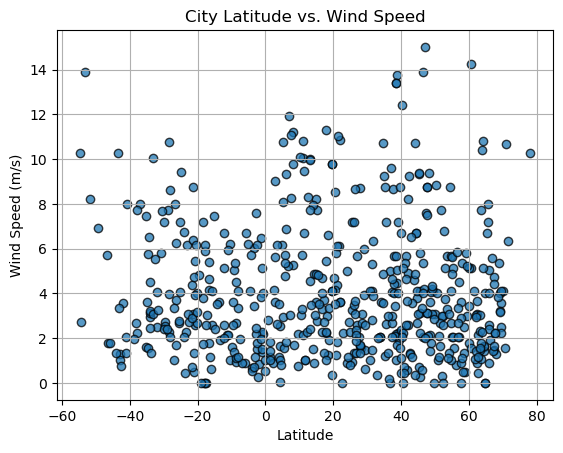

In [11]:
# Build scatter plot for latitude vs. wind speed
x_scatter_wind = city_data_df['Lat']
y_scatter_wind= city_data_df['Wind Speed']
plt.scatter(x_scatter_wind, y_scatter_wind, edgecolors= "black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bethel,41.3712,-73.4140,5.20,86,100,5.66,US,1704826706
6,hasaki,35.7333,140.8333,-2.78,42,0,2.65,JP,1704826658
9,port blair,11.6667,92.7500,25.02,83,20,1.03,IN,1704826707
11,cam pha mines,21.0167,107.3000,18.68,91,100,4.37,VN,1704826708
12,ulsteinvik,62.3432,5.8487,5.42,89,90,0.89,NO,1704826441


In [14]:
# Southern Hemisphere DataFrame
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,18.53,95,90,8.02,SH,1704826705
1,adamstown,-25.0660,-130.1015,23.98,88,99,4.08,PN,1704826626
3,grytviken,-54.2811,-36.5092,7.62,82,58,2.73,GS,1704826706
4,karratha,-20.7377,116.8463,30.43,40,87,5.43,AU,1704826706
5,port-aux-francais,-49.3500,70.2167,4.06,70,17,6.94,TF,1704826632


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7180415237969465


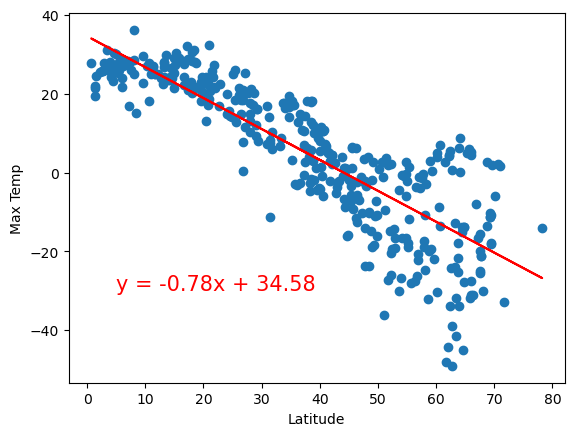

In [15]:
# Linear regression on Northern Hemisphere
x_northern = northern_hemi_df["Lat"]
y_northern_temp = northern_hemi_df["Max Temp"]


(slopeNT, interceptNT, rvalueNT, pvalueNT, stderrNT) = st.linregress(x_northern, y_northern_temp)
regress_valuesNT = x_northern * slopeNT + interceptNT
line_eqNT = "y = " + str(round(slopeNT,2)) + "x + " + str(round(interceptNT,2))

print(f"The r-value is {rvalueNT**2}")


# Build scatter plot 
plt.scatter(x_northern, y_northern_temp)
plt.plot(x_northern,regress_valuesNT,"r-")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eqNT,(5,-30),fontsize=15,color="red")


# Show plot
plt.show()


The r-value is 0.33285232782931695


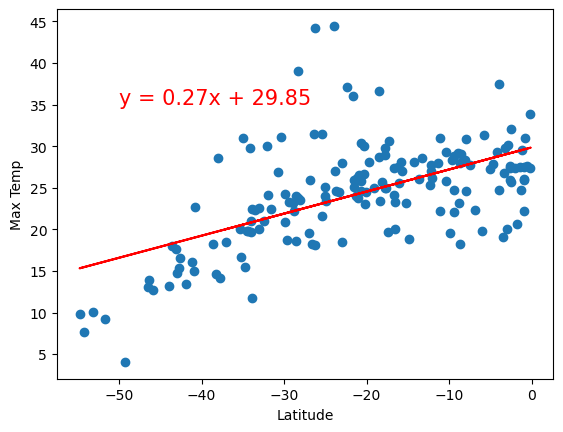

In [16]:
# Southern Hemisphere
x_southern = southern_hemi_df["Lat"]
y_southern_temp = southern_hemi_df["Max Temp"]


(slopeST, interceptST, rvalueST, pvalueST, stderrST) = st.linregress(x_southern, y_southern_temp)
regress_valuesST = x_southern * slopeST + interceptST
line_eqST = "y = " + str(round(slopeST,2)) + "x + " + str(round(interceptST,2))

print(f"The r-value is {rvalueST**2}")



# Build scatter plot 
plt.scatter(x_southern, y_southern_temp)
plt.plot(x_southern,regress_valuesST,"r-")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eqST,(-50,35),fontsize=15,color="red")


# Show plot
plt.show()

**Discussion about the linear relationship:** The regressions indicate that latitude explains the different temperatures, at least in part. In the Northern hemisphere, latitude and temperature are inversely correlated, and in the Southern hemisphere, they are positively correlated. The R-squared value reveals that latitude is a better measure of goodness-of-fit in the Northern hemipshere than in the Southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.1685633419241873


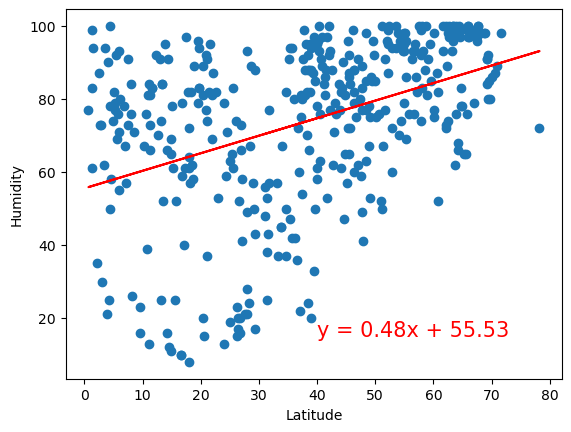

In [17]:
# Linear regression on Northern Hemisphere

y_northern_hum = northern_hemi_df["Humidity"]


(slopeNH, interceptNH, rvalueNH, pvalueNH, stderrNH) = st.linregress(x_northern, y_northern_hum)
regress_valuesNH = x_northern * slopeNH + interceptNH
line_eqNH = "y = " + str(round(slopeNH,2)) + "x + " + str(round(interceptNH,2))

print(f"The r-value is {rvalueNH**2}")


# Build scatter plot 
plt.scatter(x_northern, y_northern_hum)
plt.plot(x_northern,regress_valuesNH,"r-")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eqNH,(40,15),fontsize=15,color="red")


# Show plot
plt.show()


The r-value is 0.008838089867096981


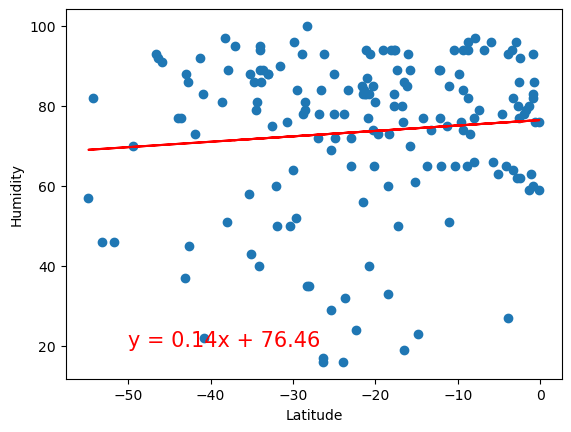

In [18]:
# Southern Hemisphere
y_southern_hum = southern_hemi_df["Humidity"]


(slopeSH, interceptSH, rvalueSH, pvalueSH, stderrSH) = st.linregress(x_southern, y_southern_hum)
regress_valuesSH = x_southern * slopeSH + interceptSH
line_eqSH = "y = " + str(round(slopeSH,2)) + "x + " + str(round(interceptSH,2))

print(f"The r-value is {rvalueSH**2}")



# Build scatter plot 

plt.scatter(x_southern, y_southern_hum)
plt.plot(x_southern,regress_valuesSH,"r-")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eqSH,(-50,20),fontsize=15,color="red")


# Show plot
plt.show()

**Discussion about the linear relationship:** The regressions indicate that latitude does not provide a good explanation for humidity in either hemisphere. Although in the Northern hemisphere, the R-squared value indicates that latitude may explain a small amount of the variability in humidity, in the Southern Hemisphere, latitude does not explain the humidity percentage.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.046382682114364575


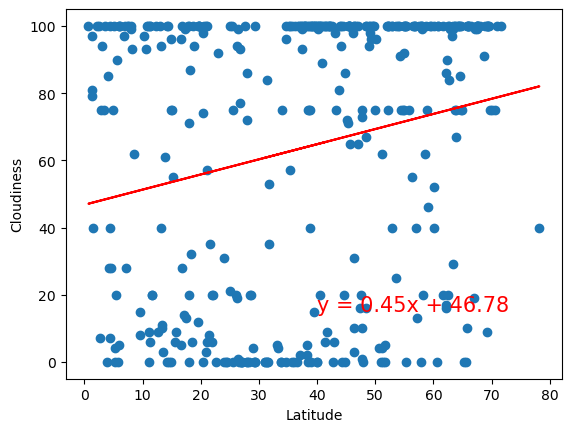

In [19]:
# Linear regression on Northern Hemisphere

y_northern_cloud = northern_hemi_df["Cloudiness"]


(slopeNC, interceptNC, rvalueNC, pvalueNC, stderrNC) = st.linregress(x_northern, y_northern_cloud)
regress_valuesNC = x_northern * slopeNC + interceptNC
line_eqNC = "y = " + str(round(slopeNC,2)) + "x + " + str(round(interceptNC,2))

print(f"The r-value is {rvalueNC**2}")


# Build scatter plot 

plt.scatter(x_northern, y_northern_cloud)
plt.plot(x_northern,regress_valuesNC,"r-")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eqNC,(40,15),fontsize=15,color="red")


# Show plot
plt.show()


The r-value is 0.002526008853520445


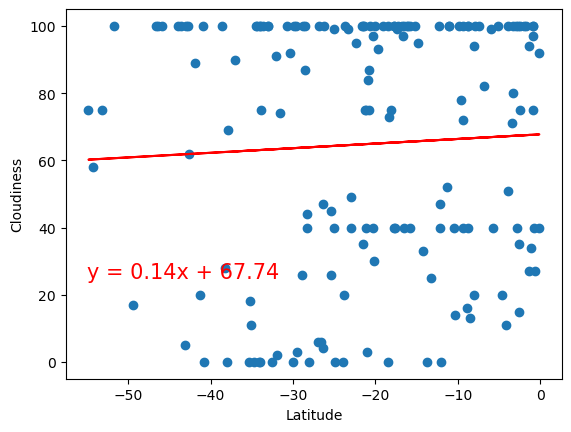

In [20]:
# Southern Hemisphere
y_southern_cloud = southern_hemi_df["Cloudiness"]


(slopeSC, interceptSC, rvalueSC, pvalueSC, stderrSC) = st.linregress(x_southern, y_southern_cloud)
regress_valuesSC = x_southern * slopeSC + interceptSC
line_eqSC = "y = " + str(round(slopeSC,2)) + "x + " + str(round(interceptSC,2))

print(f"The r-value is {rvalueSC**2}")



# Build scatter plot 

plt.scatter(x_southern, y_southern_cloud)
plt.plot(x_southern,regress_valuesSC,"r-")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eqSC,(-55,25),fontsize=15,color="red")


# Show plot
plt.show()

**Discussion about the linear relationship:** According to the R-squared for both regressions, there is no meaningful linear relationship between latitude and cloudiness in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.012093261468344187


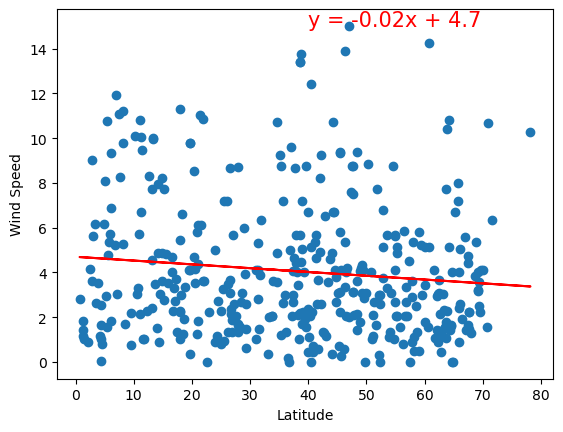

In [21]:
# Linear regression on Northern Hemisphere

y_northern_wind = northern_hemi_df["Wind Speed"]


(slopeNW, interceptNW, rvalueNW, pvalueNW, stderrNW) = st.linregress(x_northern, y_northern_wind)
regress_valuesNW = x_northern * slopeNW + interceptNW
line_eqNW = "y = " + str(round(slopeNW,2)) + "x + " + str(round(interceptNW,2))

print(f"The r-value is {rvalueNW**2}")


# Build scatter plot 

plt.scatter(x_northern, y_northern_wind)
plt.plot(x_northern,regress_valuesNW,"r-")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eqNW,(40,15),fontsize=15,color="red")


# Show plot
plt.show()


The r-value is 0.07404888801825223


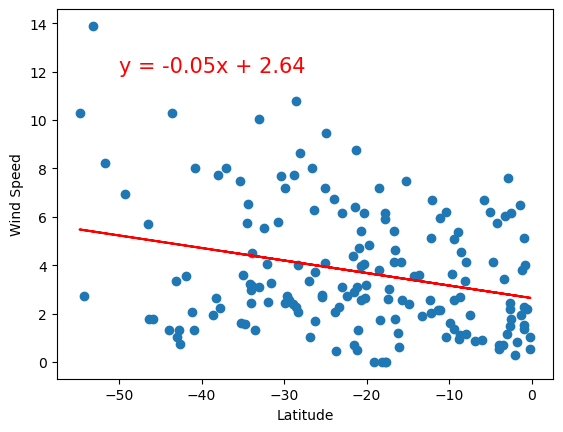

In [22]:
# Southern Hemisphere
y_southern_wind = southern_hemi_df["Wind Speed"]


(slopeSW, interceptSW, rvalueSW, pvalueSW, stderrSW) = st.linregress(x_southern, y_southern_wind)
regress_valuesSW = x_southern * slopeSW + interceptSW
line_eqSW = "y = " + str(round(slopeSW,2)) + "x + " + str(round(interceptSW,2))

print(f"The r-value is {rvalueSW**2}")



# Build scatter plot 

plt.scatter(x_southern, y_southern_wind)
plt.plot(x_southern,regress_valuesSW,"r-")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eqSW,(-50,12),fontsize=15,color="red")


# Show plot
plt.show()

**Discussion about the linear relationship:** According to the R-squared for both regressions, there is no meaningful linear relationship between latitude and wind speed in either hemisphere.